Experiment 2 is very silimar to experiment 1 except tht only 1% of trainig data is used and the data is preprocess before being passed into the the model for training.

1. Importing helping functions and the data

In [56]:
from help_functions import download_and_unzip, dir_explore, create_callbacks, plot_loss_curves

In [21]:
url =  'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip'
zip_file_name = '10_food_classes_1_percent.zip'
data_folder_path = zip_file_name[:-4]

download_and_unzip(url, zip_file_name)

Beginning file download...


In [22]:
dir_explore(zip_file_name[:-4])

There are 2 directories and 0 files in 10_food_classes_1_percent folder.
There are 10 directories and 0 files in 10_food_classes_1_percent\test folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\chicken_curry folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\chicken_wings folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\fried_rice folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\grilled_salmon folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\hamburger folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\ice_cream folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\pizza folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\ramen folder.
There are 0 directories and 250 files in 10_food_classes_1_percent\test\steak folder.
There are 0 directories and 250 file

2. Defining the training and testing data flow process.

In [50]:
import tensorflow as tf

batch_size=32
image_size=(222,222)

train_data_dir = data_folder_path + '/train'
test_data_dir = data_folder_path + '/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_data_dir, 
                                                                batch_size=batch_size, 
                                                                image_size=image_size,
                                                                label_mode='categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_data_dir, 
                                                                batch_size=batch_size, 
                                                                image_size=image_size,
                                                                 label_mode='categorical')

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


3. Defining data augmentation layers

In [51]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name = 'data_augmentation')

4. Viewing a random image with/without data augmentation.

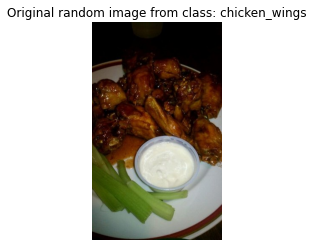

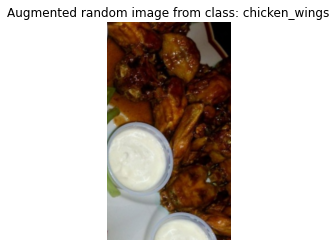

In [52]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import os

def view_random_image(train_data_path):
    target_class = random.choice(os.listdir(train_data_path)) # choose a random class
    target_dir = train_data_path + '/' + target_class # create the target directory
    random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
    random_image_path = target_dir + "/" + random_image # create the choosen random image path
    img = mpimg.imread(random_image_path) # read in the chosen target image
    plt.imshow(img) # plot the target image
    plt.title(f"Original random image from class: {target_class}")
    plt.axis(False); # turn off the axes
    return img, target_class

img, target_class = view_random_image(train_data_dir)

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

5. Defining the model sequence.

In [53]:
from tensorflow import keras

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

input = tf.keras.layers.Input(shape = image_size + (3,) , name="input_layer")

x = data_augmentation(input)

x = base_model(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

output = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

model_1 = keras.Model(input, output)

6. Compiling and fitting the model

In [54]:
from tensorflow.keras.optimizers import Adam
model_1.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_1_history = model_1.fit(train_data, 
            steps_per_epoch=len(train_data), 
            epochs=5,   
            validation_data=test_data, 
            validation_steps=int(0.25*len(test_data)),
            callbacks = create_callbacks(tensorboard_dir_name='TensorBoard',
                                            experiment_name= 'EfficientNet_FineTuning_Exp_02',
                                            checkpoint_path = 'Models/Exp_02_Models/model_1_ep_{epoch:02d}_val_accuracy_{val_accuracy:.04f}.h5')
                                            )

Saving TensorBoard log files to: TensorBoard/EfficientNet_FineTuning_Exp_02/20211124-234511
Epoch 1/5


C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 23s 8s/step - loss: 2.4591 - accuracy: 0.0571 - val_loss: 2.2872 - val_accuracy: 0.1447
Epoch 2/5
3/3 [==============================] - 16s 7s/step - loss: 2.1855 - accuracy: 0.2571 - val_loss: 2.1599 - val_accuracy: 0.2089
Epoch 3/5
3/3 [==============================] - 15s 7s/step - loss: 2.0008 - accuracy: 0.3857 - val_loss: 2.0505 - val_accuracy: 0.3092
Epoch 4/5
3/3 [==============================] - 15s 7s/step - loss: 1.8286 - accuracy: 0.4714 - val_loss: 1.9473 - val_accuracy: 0.3635
Epoch 5/5
3/3 [==============================] - 15s 7s/step - loss: 1.6890 - accuracy: 0.6000 - val_loss: 1.8423 - val_accuracy: 0.4622


7. Model evaluation and plotting the loss curves

In [55]:
model_1.evaluate(test_data)

79/79 [==============================] - 57s 712ms/step - loss: 1.8638 - accuracy: 0.4284


[1.8637548685073853, 0.4284000098705292]

42 % is not a good accuracy - Increasing the training data can help.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


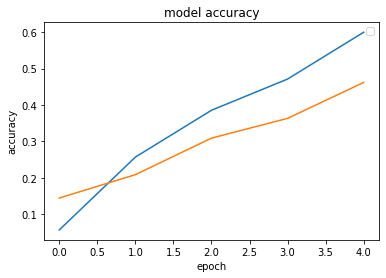

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


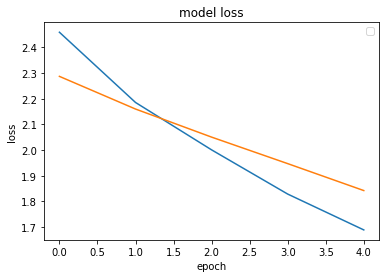

In [57]:
plot_loss_curves(model_1_history)

In [58]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 222, 222, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina